<a href="https://colab.research.google.com/github/adalves-ufabc/2023.Q1-PLN/blob/main/2023_Q1_PLN_Notebook_House_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2023.Q1]**
Prof. Alexandre Donizeti Alves

## **PROJETO PRÁTICO [Série House]**
---



**Conjunto de Dados**

In [ ]:
import requests
import zipfile
from io import BytesIO

# ID do arquivo zip no Google Drive
file_id = "1_rAzomhikVwtK32LV_yGhTKGuUsoEQ10"

# URL de download do arquivo zip
url = f"https://drive.google.com/uc?id={file_id}&export=download"

# Faz o download do arquivo zip
response = requests.get(url)
file_bytes = BytesIO(response.content)

# Extrai o arquivo zip
with zipfile.ZipFile(file_bytes, "r") as zip_ref:
    zip_ref.extractall()

In [ ]:
import pandas as pd

# Lê o arquivo Excel em um DataFrame
df = pd.read_excel('/content/house_season_1-8.xlsx')

df

,season,num_episode,episode,title,director,character,transcript
0,1,1,1.01,Pilot,Bryan Singer,Melanie,Why are you late?
1,1,1,1.01,Pilot,Bryan Singer,Rebecca,You’re not going to like the answer.
2,1,1,1.01,Pilot,Bryan Singer,Melanie,I already know the answer.
3,1,1,1.01,Pilot,Bryan Singer,Rebecca,I missed the bus.
4,1,1,1.01,Pilot,Bryan Singer,Melanie,"I don’t doubt it, no bus stops near Brad’s. Yo..."
...,...,...,...,...,...,...,...
76460,8,177,8.22,Everybody Dies,David Shore,House,Just switched the dental records.
76461,8,177,8.22,Everybody Dies,David Shore,Wilson,You're destroying your entire life. You can't ...
76462,8,177,8.22,Everybody Dies,David Shore,House,"I'm dead, Wilson. How do you want to spend you..."
76463,8,177,8.22,Everybody Dies,David Shore,Wilson,When the cancer starts getting really bad…


**Análise de Sentimentos**

A análise de sentimentos pode ser aplicada de várias maneiras sobre a série "House". Aqui estão algumas ideias:

   * Análise dos personagens mais populares: utilize a análise de sentimentos para determinar quais personagens são mais populares com o público. Analise o sentimento expressado em torno de cada personagem e encontre aqueles com os sentimentos mais positivos (ou negativos).

   * Análise dos episódios mais populares: utilize a análise de sentimentos para determinar quais episódios são os mais populares entre o público. Analise o sentimento expressado em torno de cada episódio e encontre aqueles com os sentimentos mais positivos.

   * Análise da evolução emocional dos personagens: utilize a análise de sentimentos para acompanhar a evolução emocional dos personagens ao longo da série. Analise o sentimento expressado em torno de cada personagem em cada episódio e determine como seus sentimentos mudaram ao longo do tempo.

   * Análise de tendências de sentimentos ao longo da série: utilize a análise de sentimentos para identificar tendências de sentimentos ao longo da série. Analise o sentimento expressado em torno de diferentes personagens, episódios ou aspectos da série e determine se há tendências de sentimentos positivos, negativos ou neutros ao longo do tempo.


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline

model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [ ]:
def get_transcripts_by_character_season(df, character, seasons):
    # Filtra o DataFrame pelo nome do personagem e as temporadas desejadas
    filtered_df = df[(df['character'] == character) & (df['season'].isin(seasons))]
    
    # Retorna todas as falas do personagem 
    return filtered_df['transcript']

In [ ]:
get_transcripts_by_character_season(df, 'Foreman', [1])

56                                         It’s a lesion.
58      Shouldn’t we be speaking to the patient before...
60                                               No, but…
63         Isn’t treating patients why we became doctors?
65      So you’re trying to eliminate the humanity fro...
                              ...                        
9776                       You need the consent from him.
9788    This is not good.  He could have embolism, tac...
9793                   It’s not an attack, he’s stroking!
9797    Heart rate’s in the 40s, bradycardia, we’re lo...
9801    You were wrong!  [House doesn’t listen, but gr...
Name: transcript, Length: 1179, dtype: object

In [ ]:
def get_sentiments_by_character_season(df, character, seasons):

    # Cria um objeto de pipeline para análise de sentimentos
    classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
    
    # Filtra o DataFrame pelo nome do personagem e as temporadas desejadas
    filtered_df = df[(df['character'] == character) & (df['season'].isin(seasons))]
    
    # Aplica a análise de sentimento em cada fala do personagem
    results = []
    for row in filtered_df.itertuples():
        sentiment = classifier(row.transcript)[0]
        results.append({'season': row.season, 'num_episode': row.num_episode, 'episode': row.episode, 
                        'transcript': row.transcript, 'label': sentiment['label'], 'score': sentiment['score']})
    
    # Cria um novo DataFrame com as informações de cada fala do personagem
    new_df = pd.DataFrame(results)
    
    # Retorna o novo DataFrame
    return new_df

In [ ]:
sentiments_df = get_sentiments_by_character_season(df, 'Foreman', [1])

sentiments_df

,season,num_episode,episode,transcript,label,score
0,1,1,1.01,It’s a lesion.,negative,0.917171
1,1,1,1.01,Shouldn’t we be speaking to the patient before...,neutral,0.764115
2,1,1,1.01,"No, but…",neutral,0.640784
3,1,1,1.01,Isn’t treating patients why we became doctors?,negative,0.614824
4,1,1,1.01,So you’re trying to eliminate the humanity fro...,negative,0.897427
...,...,...,...,...,...,...
1174,1,22,1.22,You need the consent from him.,neutral,0.685039
1175,1,22,1.22,"This is not good. He could have embolism, tac...",negative,0.883720
1176,1,22,1.22,"It’s not an attack, he’s stroking!",negative,0.625145
1177,1,22,1.22,"Heart rate’s in the 40s, bradycardia, we’re lo...",negative,0.897126


In [ ]:
def get_sentiment_summary(sentiments_df):
    # Calcula a média dos scores para cada sentimento
    mean_scores = sentiments_df.groupby('label')['score'].mean()
    
    # Verifica qual sentimento teve o maior score médio
    max_sentiment = mean_scores.idxmax()
    
    # Retorna o resultado formatado
    if max_sentiment == 'negative':
        return "NEGATIVO", mean_scores[max_sentiment]
    elif max_sentiment == 'positive':
        return "POSITIVO", mean_scores[max_sentiment]
    else:
        return "NEUTRO", mean_scores['neutral']

In [ ]:
get_sentiment_summary(sentiments_df)

('NEGATIVO', 0.728348998221893)

In [ ]:
def get_sentiment_stats(sentiments_df):
    # Total de frases
    total = len(sentiments_df)
    
    # Total de frases positivas
    pos_count = len(sentiments_df[sentiments_df['label'] == 'positive'])
    
    # Total de frases negativas
    neg_count = len(sentiments_df[sentiments_df['label'] == 'negative'])
    
    # Total de frases neutras
    neu_count = len(sentiments_df[sentiments_df['label'] == 'neutral'])
    
    # Percentual de frases positivas
    pos_perc = round((pos_count / total) * 100, 2)
    
    # Percentual de frases negativas
    neg_perc = round((neg_count / total) * 100, 2)
    
    # Percentual de frases neutras
    neu_perc = round((neu_count / total) * 100, 2)
    
    # Retorna um dicionário com as estatísticas
    return {
        'Total': total,
        'Positivas': pos_count,
        'Negativas': neg_count,
        'Neutras': neu_count,
        '% Positivas': pos_perc,
        '% Negativas': neg_perc,
        '% Neutras': neu_perc
    }

In [ ]:
get_sentiment_stats(sentiments_df)

{'Total': 1179,
 'Positivas': 97,
 'Negativas': 583,
 'Neutras': 499,
 '% Positivas': 8.23,
 '% Negativas': 49.45,
 '% Neutras': 42.32}

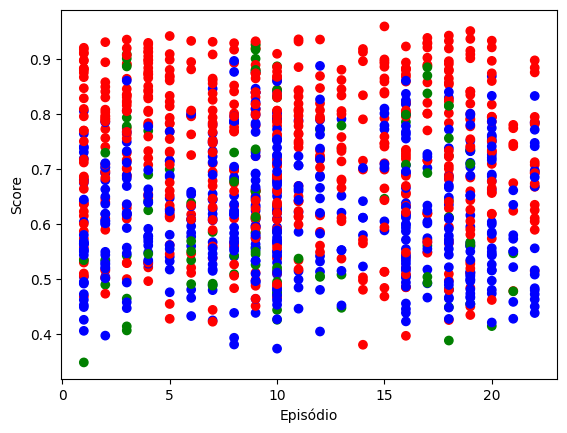

In [ ]:
import matplotlib.pyplot as plt

# Mapeia as cores de acordo com o label
colors = {"positive": "green", "negative": "red", "neutral": "blue"}

# Cria o gráfico de dispersão
plt.scatter(sentiments_df["num_episode"], sentiments_df["score"], c=sentiments_df["label"].apply(lambda x: colors[x]))

# Adiciona rótulos nos eixos x e y
plt.xlabel("Episódio")
plt.ylabel("Score")

# Exibe o gráfico
plt.show()

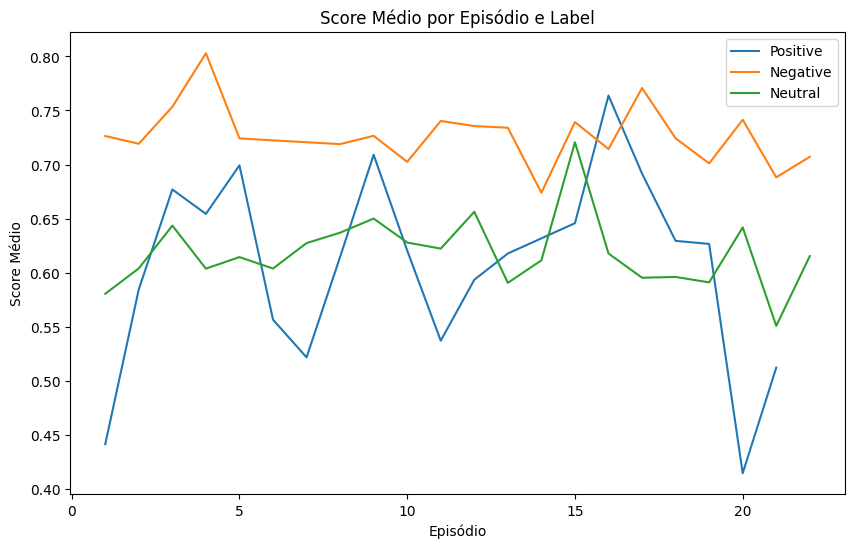

In [ ]:
import matplotlib.pyplot as plt

# Agrupa os dados por temporada, episódio e label, e calcula o score médio de cada grupo
grouped = sentiments_df.groupby(['season', 'num_episode', 'label'])['score'].mean().reset_index()

# Separa os dados em diferentes DataFrames de acordo com o label
positive_scores = grouped[grouped['label'] == 'positive']
negative_scores = grouped[grouped['label'] == 'negative']
neutral_scores = grouped[grouped['label'] == 'neutral']

# Cria o gráfico de linhas
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(positive_scores['num_episode'], positive_scores['score'], label='Positive')
ax.plot(negative_scores['num_episode'], negative_scores['score'], label='Negative')
ax.plot(neutral_scores['num_episode'], neutral_scores['score'], label='Neutral')

ax.set_xlabel('Episódio')
ax.set_ylabel('Score Médio')
ax.set_title('Score Médio por Episódio e Label')
ax.legend()

plt.show()

In [ ]:
def get_sentiments_by_character_episode(df, character, episodes):
    
    # Cria um objeto de pipeline para análise de sentimentos
    classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
    
    # Filtra o DataFrame pelo nome do personagem e os episódios desejados
    filtered_df = df[(df['character'] == character) & (df['episode'].isin(episodes))]
    
    # Aplica a análise de sentimento em cada fala do personagem
    results = []
    for row in filtered_df.itertuples():
        sentiment = classifier(row.transcript)[0]
        results.append({'season': row.season, 'num_episode': row.num_episode, 'episode': row.episode, 
                        'transcript': row.transcript, 'label': sentiment['label'], 'score': sentiment['score']})    
    
    # Cria um novo DataFrame com as informações de cada fala do personagem
    new_df = pd.DataFrame(results)
    
    # Retorna o novo DataFrame
    return new_df

In [ ]:
sentiments_df = get_sentiments_by_character_episode(df, 'Foreman', [1.01, 1.02, 1.03, 1.04, 1.05])

In [ ]:
sentiments_df

,season,num_episode,episode,transcript,label,score
0,1,1,1.01,Dr. House doesn’t like dealing with patients.,negative,0.863357
1,1,1,1.01,Creutzfeld-Jakob disease.,negative,0.737507
2,1,1,1.01,Dr. House is the head of diagnostic medicine. ...,positive,0.537926
3,1,1,1.01,"Basically, whatever’s in your head, lights up ...",positive,0.465504
4,1,1,1.01,"All right Rebecca, [over intercom] we know you...",negative,0.498907
...,...,...,...,...,...,...
228,1,5,1.05,I just wanted to say that I know that you did ...,positive,0.542781
229,1,5,1.05,I was just being nice.,neutral,0.432630
230,1,5,1.05,Merry Christmas. [She hands House a present. C...,positive,0.700701
231,1,5,1.05,Can we get her records? What hospital was it at?,neutral,0.799899


In [ ]:
get_sentiment_stats(sentiments_df)

{'Total': 233,
 'Positivas': 21,
 'Negativas': 108,
 'Neutras': 104,
 '% Positivas': 9.01,
 '% Negativas': 46.35,
 '% Neutras': 44.64}

In [ ]:
import matplotlib.pyplot as plt

def plot_scores_by_episode(sentiments_df):
    # Agrupa os dados por temporada, episódio e label, e calcula o score médio de cada grupo
    grouped = sentiments_df.groupby(['season', 'num_episode', 'label'])['score'].mean().reset_index()

    # Separa os dados em diferentes DataFrames de acordo com o label
    positive_scores = grouped[grouped['label'] == 'positive']
    negative_scores = grouped[grouped['label'] == 'negative']
    neutral_scores = grouped[grouped['label'] == 'neutral']

    # Cria o gráfico de linhas
    fig, ax = plt.subplots(figsize=(10,6))

    ax.plot(positive_scores['num_episode'], positive_scores['score'], label='Positive')
    ax.plot(negative_scores['num_episode'], negative_scores['score'], label='Negative')
    ax.plot(neutral_scores['num_episode'], neutral_scores['score'], label='Neutral')

    ax.set_xlabel('Episódio')
    ax.set_ylabel('Score Médio')
    ax.set_title('Score Médio por Episódio e Label')
    ax.legend()

    # Define que os valores do eixo x serão os números dos episódios
    ax.set_xticks(grouped['num_episode'])

    ax.axhline(y=0.7, color='gray', linestyle='--')

    plt.show()

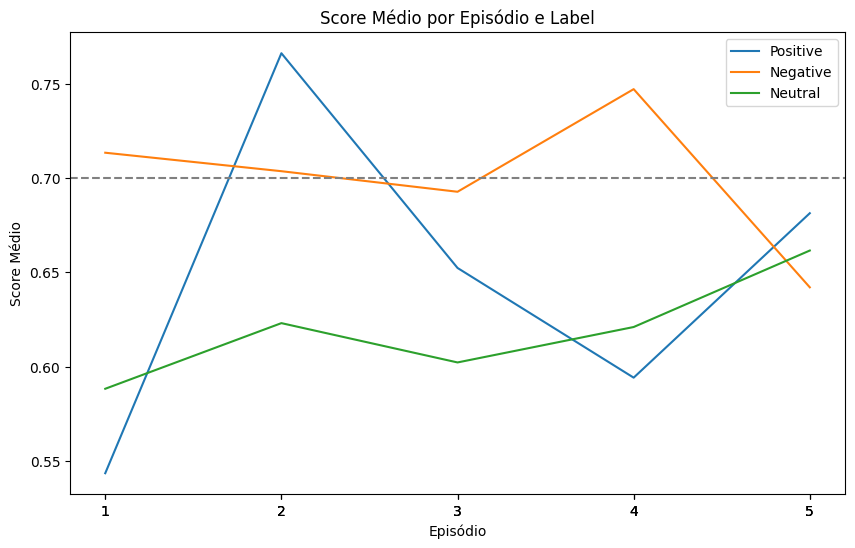

In [ ]:
plot_scores_by_episode(sentiments_df)